In [161]:
import sys

import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [162]:
Mouse= pd.read_csv('mouse.txt', header=None, sep=' ')

In [163]:
X_Mouse = Mouse.values
X_Mouse.shape

(500, 2)

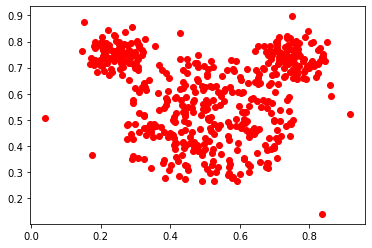

In [164]:
plt.plot(X_Mouse[:,0], X_Mouse[:,1], 'ro')
plt.show()

In [165]:
from sklearn.ensemble import IsolationForest

In [166]:
IF = IsolationForest(n_estimators=1000, contamination=0.02, random_state=42)
IF.fit(X_Mouse)
anomalie= IF.predict(X_Mouse)

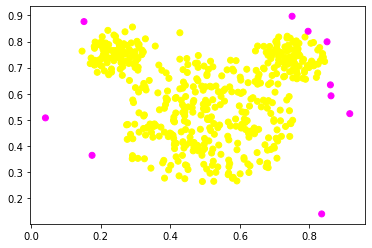

In [167]:
plt.scatter(X_Mouse[:,0], X_Mouse[:,1], c=anomalie, cmap=plt.get_cmap('spring'))
plt.show()

In [168]:
score = IF.decision_function(X_Mouse)

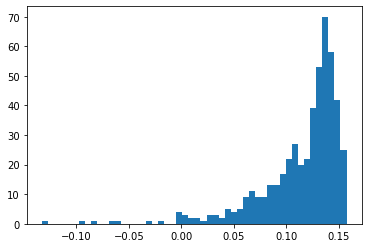

In [169]:
plt.hist(score, bins=50)
plt.show()

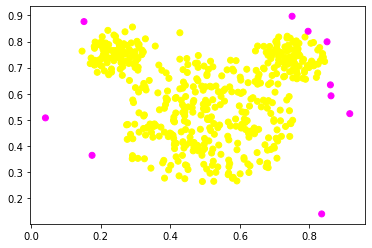

In [170]:
anomalie = score.copy()
anomalie[anomalie>0.0] = 1
anomalie[anomalie<=0.0] = -1
plt.scatter(X_Mouse[:,0], X_Mouse[:,1], c=anomalie, cmap=plt.get_cmap('spring'))
plt.show()

## Exercice 2 ##

In [171]:
ccard = pd.read_csv("creditcard.csv")

In [172]:
ccard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [173]:
indices_0 = np.array(ccard.index[ccard['Class'] == 0].to_list())
indices_0 = np.random.choice(indices_0, 5000).astype(int)
indices_1 = np.array(ccard.index[ccard['Class'] == 1].to_list()).astype(int)
indices = np.concatenate((indices_1, indices_0))

In [174]:
Y = np.array(ccard.iloc[indices, -1])
Y.shape

(5492,)

In [175]:
X = np.array(ccard.iloc[indices,1:-1])
X.shape

(5492, 29)

In [176]:
IF = IsolationForest(n_estimators=5000, contamination=len(Y[Y==1])/len(Y), random_state=42)

In [177]:
IF.fit(X)
anomalie= IF.predict(X)

In [178]:
score = IF.decision_function(X)

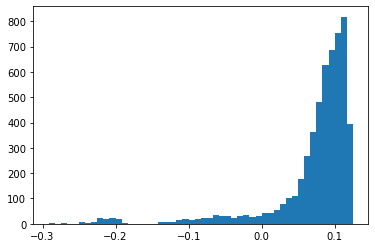

In [179]:
plt.hist(score, bins=50)
plt.show()

In [180]:
anom2 = anomalie.copy()
anom2[score>0.08] = 2
anom2[score<=0.08] = 1
anom2[anom2 == 2] = 0

Etude du seuil d'acceptation des anomalies pour améliorer le rappel. Avec le seuil actuel on arrive à 95% pour le recall. l'accuracy a en revanche bien baissé (70%) à cause de la perte de précision (0.2%)

In [181]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print(confusion_matrix(Y, anom2))
print("Accuracy: {:.3f}".format(accuracy_score(Y, anom2)))
print("Precision: {:.3f} \n".format(precision_score(Y, anom2)))
print("Recall: {:.3f} \n".format(recall_score(Y, anom2)))

[[3476 1524]
 [  28  464]]
Accuracy: 0.717
Precision: 0.233 

Recall: 0.943 

